# Capstone 2 - Step 6 Documentation

# The Data Science Method



1.Problem Identification

2.Data Wrangling

    
- Data Collection
- Data Organization
- Data Definition
- Data Cleaning


3.Exploratory Data Analysis

- Build data profile tables and plots

  - Outliers & Anomalies

- Explore data relationships
- Identification and creation of features

4.Pre-processing and Training Data Development


   - Create dummy or indicator features for categorical variables
   - Standardize the magnitude of numeric features
   - Split into testing and training datasets
   - Apply scaler to the testing set


5.Modeling

      
   - Fit Models with Training Data Set
   - Review Model Outcomes — Iterate over additional models as needed.
   - Identify the Final Model


6.Documentation

- Review the Results
- Present and share your findings - storytelling
- Finalize Code
- Finalize Documentation

# Credit Card Fraud Detection

Fraud detection is a serious problem of the modern world. The news reports on countless attacks of credit card information being stolen annually. The transactions of fraudulent cards might seem minimal in occurrence but, on a larger scale these small occurrences can cost companies millions in losses. This is where machine learning comes into play learning from the patterns and adapting to new possible schemes. Machine learning can give credit card companies the ability to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

In [60]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, explained_variance_score,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import tkinter as tk 
from scipy.stats import gaussian_kde
import pickle

# The Data Set

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Load the Data

In [61]:
df=pd.read_csv('C:\\Users\\arna_mora\\Springboard\\unit 7\\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [63]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [64]:
print(df.shape)

(283726, 31)


In [66]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


% of Valid transactions:  0.9983328986416472
% of Fraud transactions:  0.001667101358352777
All transactions:  283726


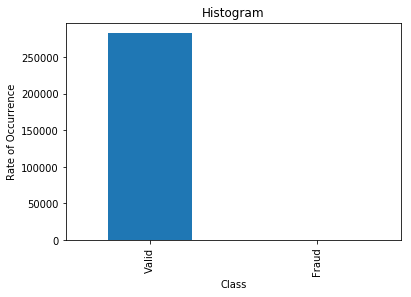

In [67]:
quantity_classes = pd.value_counts(df['Class'], sort = True).sort_index()
quantity_classes.plot(kind = 'bar')
plt.title("Histogram")
plt.xlabel("Class")
plt.ylabel("Rate of Occurrence")
plt.xticks([0,1],["Valid","Fraud"])

print("% of Valid transactions: ", len(df[df.Class == 0])/len(df))
print("% of Fraud transactions: ", len(df[df.Class == 1])/len(df))
print("All transactions: ", len(df))

Correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction. Finally, it would be interesting to know if there are any significant correlations between our predictors, especially with regards to our class variable. One of the most visually appealing ways to determine that is by using a heatmap.

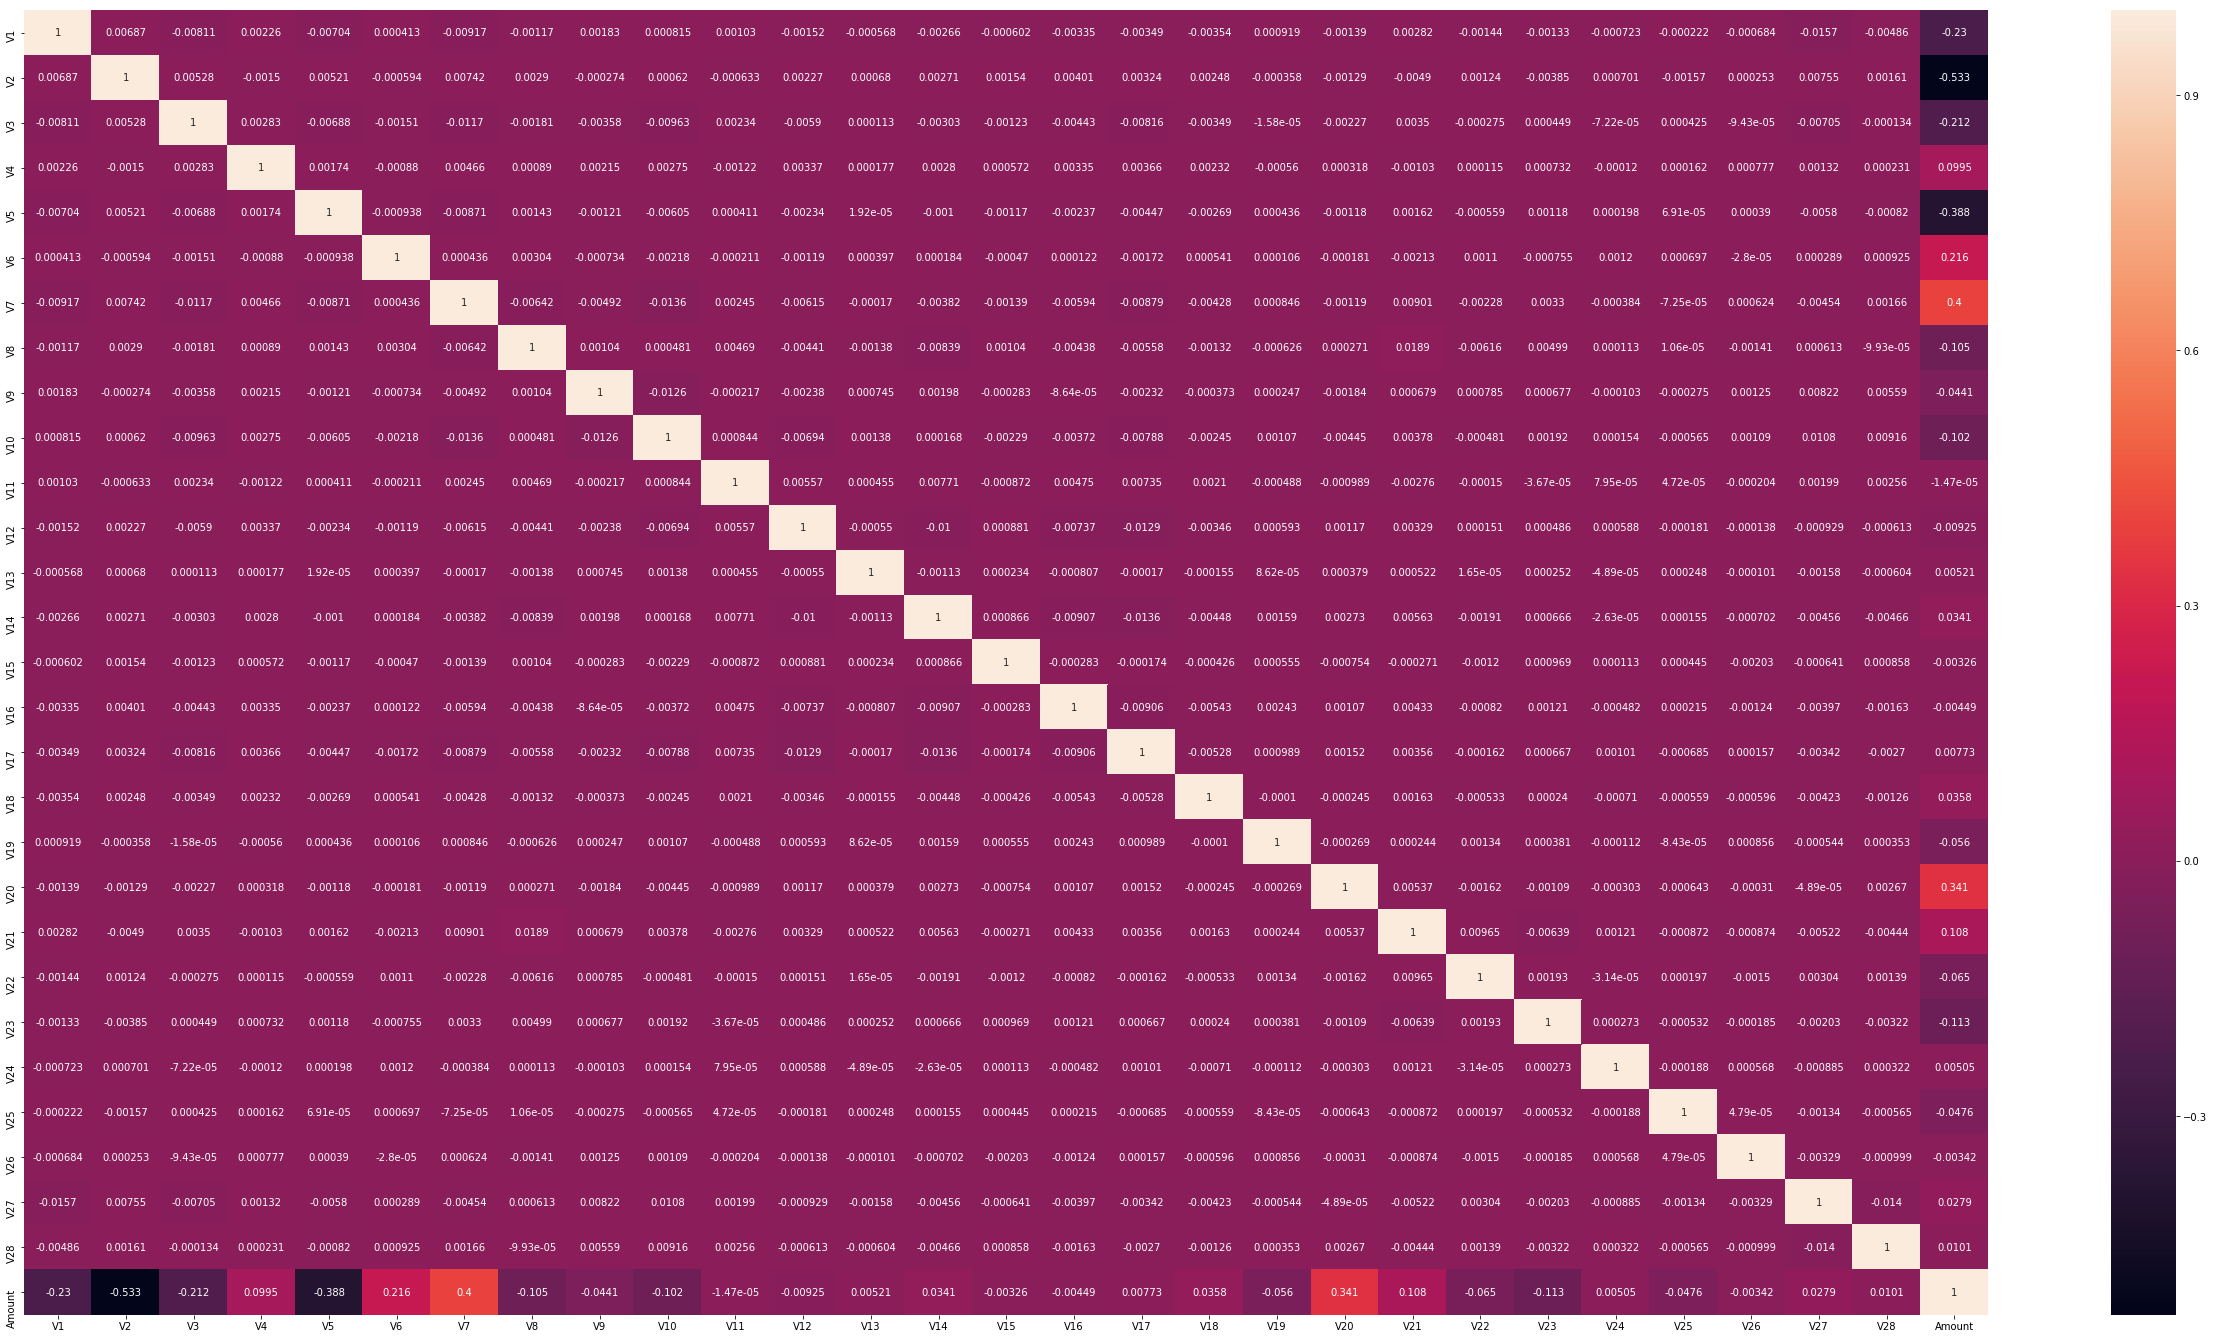

In [68]:
# calculate the correlation matrix
df.drop(['Time', 'Class'],axis=1, inplace=True)

corr = df.corr()

plt.subplots(figsize=(44,24))
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt='.3g')


In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.



Let's plot the correlated and inverse correlated values on the same graph.
I would like to start wit V2, V5 (highly negatively correlated) with Amount,and also V7, V20 with Amount(highly positively correlated) with Amount.

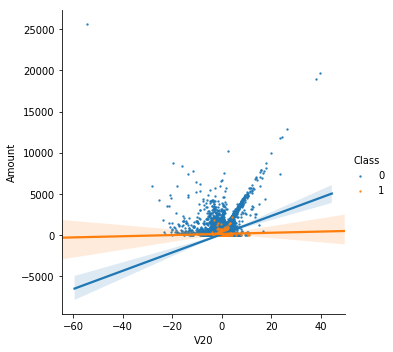

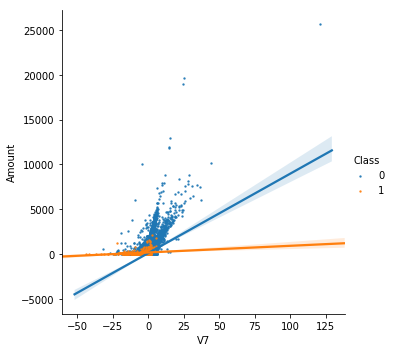

In [103]:
s = sns.lmplot(x='V20', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two couples of features are correlated (the regression lines for Class = 0 have a positive slope, whilst the regression line for Class = 1 have a smaller positive slope).

Let's plot now the inverse correlated values.(V2, V5 with Amount)



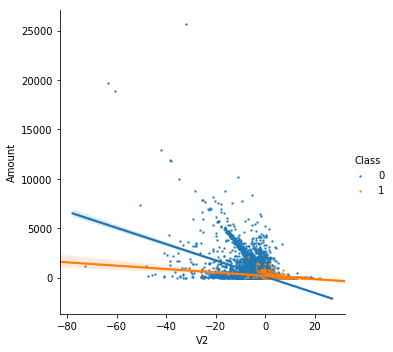

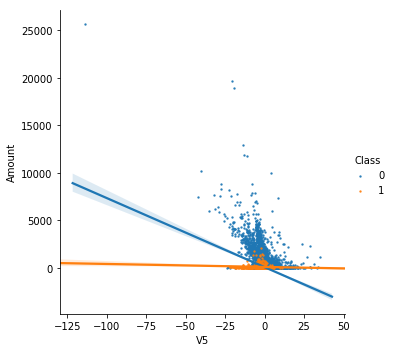

In [104]:
s = sns.lmplot(x='V2', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two couples of features are inverse correlated (the regression lines for Class = 0 have a negative slope while the regression lines for Class = 1 have a very small negative slope).

In [73]:
# information of all columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 29 columns):
V1        283726 non-null float64
V2        283726 non-null float64
V3        283726 non-null float64
V4        283726 non-null float64
V5        283726 non-null float64
V6        283726 non-null float64
V7        283726 non-null float64
V8        283726 non-null float64
V9        283726 non-null float64
V10       283726 non-null float64
V11       283726 non-null float64
V12       283726 non-null float64
V13       283726 non-null float64
V14       283726 non-null float64
V15       283726 non-null float64
V16       283726 non-null float64
V17       283726 non-null float64
V18       283726 non-null float64
V19       283726 non-null float64
V20       283726 non-null float64
V21       283726 non-null float64
V22       283726 non-null float64
V23       283726 non-null float64
V24       283726 non-null float64
V25       283726 non-null float64
V26       283726 non-null float64
V27  

In [80]:
#For now I will look the "normal" columns
df[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,283726.000000,283726.000000,283726.000000
mean,94811.077600,88.472687,0.001667
std,47481.047891,250.399437,0.040796
min,0.000000,0.000000,0.000000
25%,54204.750000,5.600000,0.000000
50%,84692.500000,22.000000,0.000000
75%,139298.000000,77.510000,0.000000
max,172792.000000,25691.160000,1.000000


OBSERVATIONS:

1. Mean transaction is somewhere is 88 and standard deviation is around 250.

2. The median is 22 which is very less as compared to mean which signifies that there are outliers or our data is highly positive skewed which is effecting the amount and thus the mean.

3. The maximum transaction that was done is of 25,691 and minimum is 0.

4. The Time maximum is 172792 seconds which is equal to 172792/60*60 = 47.99 ~ 48 hours

In [95]:
df=pd.read_csv('C:\\Users\\arna_mora\\Springboard\\unit 7\\creditcard.csv',delimiter=',', encoding="utf-8-sig")
df['Hour'] = df['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)

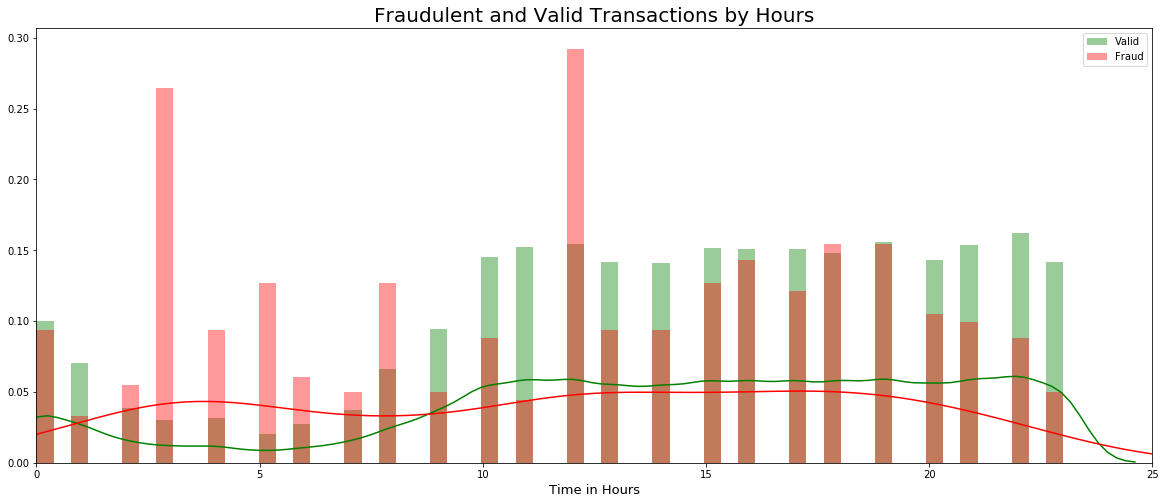

In [78]:
# Exploring the distribuition by Class types throught hours and minutes

plt.figure(figsize=(20,8))


sns.distplot(df[df['Class'] == 0]['Hour'], bins=60, color='g', label='Valid')
sns.distplot(df[df['Class'] == 1]["Hour"], bins=60, color='r', label='Fraud')

plt.title('Fraudulent and Valid Transactions by Hours', fontsize=20)

plt.xlabel("Time in Hours", fontsize=13)
plt.xlim([0,25])
plt.legend()
plt.show()

Fraudulent transactions by hour

As we can see ,the most fraudulent transactions happening at 3, 12 o'clock. Fraudulent transactions of the same account didn't happen consecutively.

In [84]:
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Valid")
print (df.Time[df.Class == 0].describe())

Fraud
count       473.000000
mean      80450.513742
std       48636.179973
min         406.000000
25%       41203.000000
50%       73408.000000
75%      129095.000000
max      170348.000000
Name: Time, dtype: float64

Valid
count    283253.000000
mean      94835.058093
std       47475.550607
min           0.000000
25%       54233.000000
50%       84711.000000
75%      139308.000000
max      172792.000000
Name: Time, dtype: float64


In [89]:
#To clearly the data of frauds and no frauds
print ("Fraud")
print (df.Amount[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Amount[df.Class == 0].describe())


Fraud
count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64


# Feature engineering to a better visualization of the values

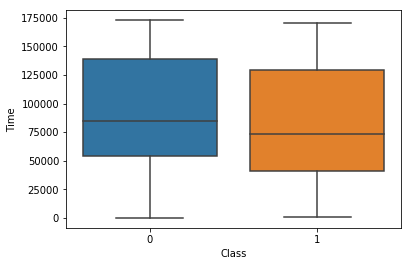

In [90]:
sns.boxplot(x = "Class", y = "Time", data = df)
plt.show()

By looking at the above box plot we can say that both fraud & valid transactions occur throughout time and there is no distinction between them.

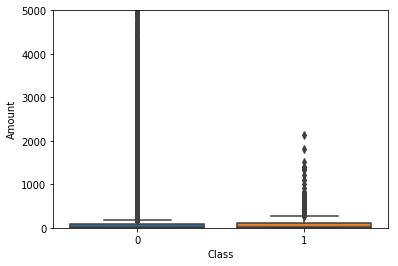

In [91]:
sns.boxplot(x = "Class", y = "Amount", data = df)
plt.ylim(0, 5000)
plt.show()

From above box plot we can easily infer that there are no fraud transactions occur above the transaction amount of 3000. All of the fraud transactions have transaction amount less than 3000. However, there are many transactions which have a transaction amount greater than 3000 and all of them are valid.

Looking a scatter plot of the Time_hour distribuition by Amount

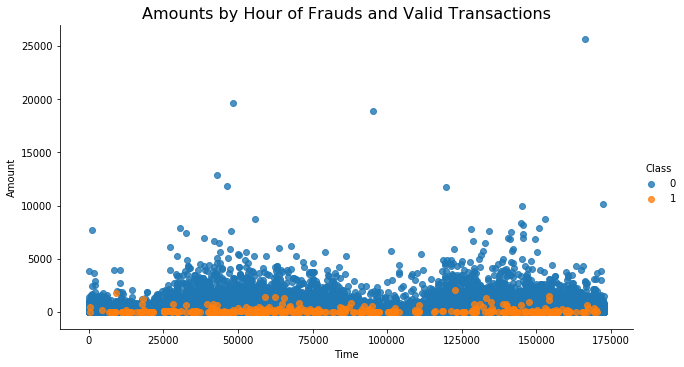

In [100]:
ax = sns.lmplot(y="Amount", x="Time", fit_reg=False,aspect=1.8, data=df, hue='Class')
df=pd.read_csv('C:\\Users\\arna_mora\\Springboard\\unit 7\\creditcard.csv',delimiter=',', encoding="utf-8-sig")               
plt.title("Amounts by Hour of Frauds and Valid Transactions", fontsize=16)

plt.show()

From the above plot it is clearly visible that there are frauds only on the transactions which have transaction amount approximately less than 2500. Transactions which have transaction amount approximately above 2500 have no fraud.

Now I will be visualizing all the features from the dataset on graphs

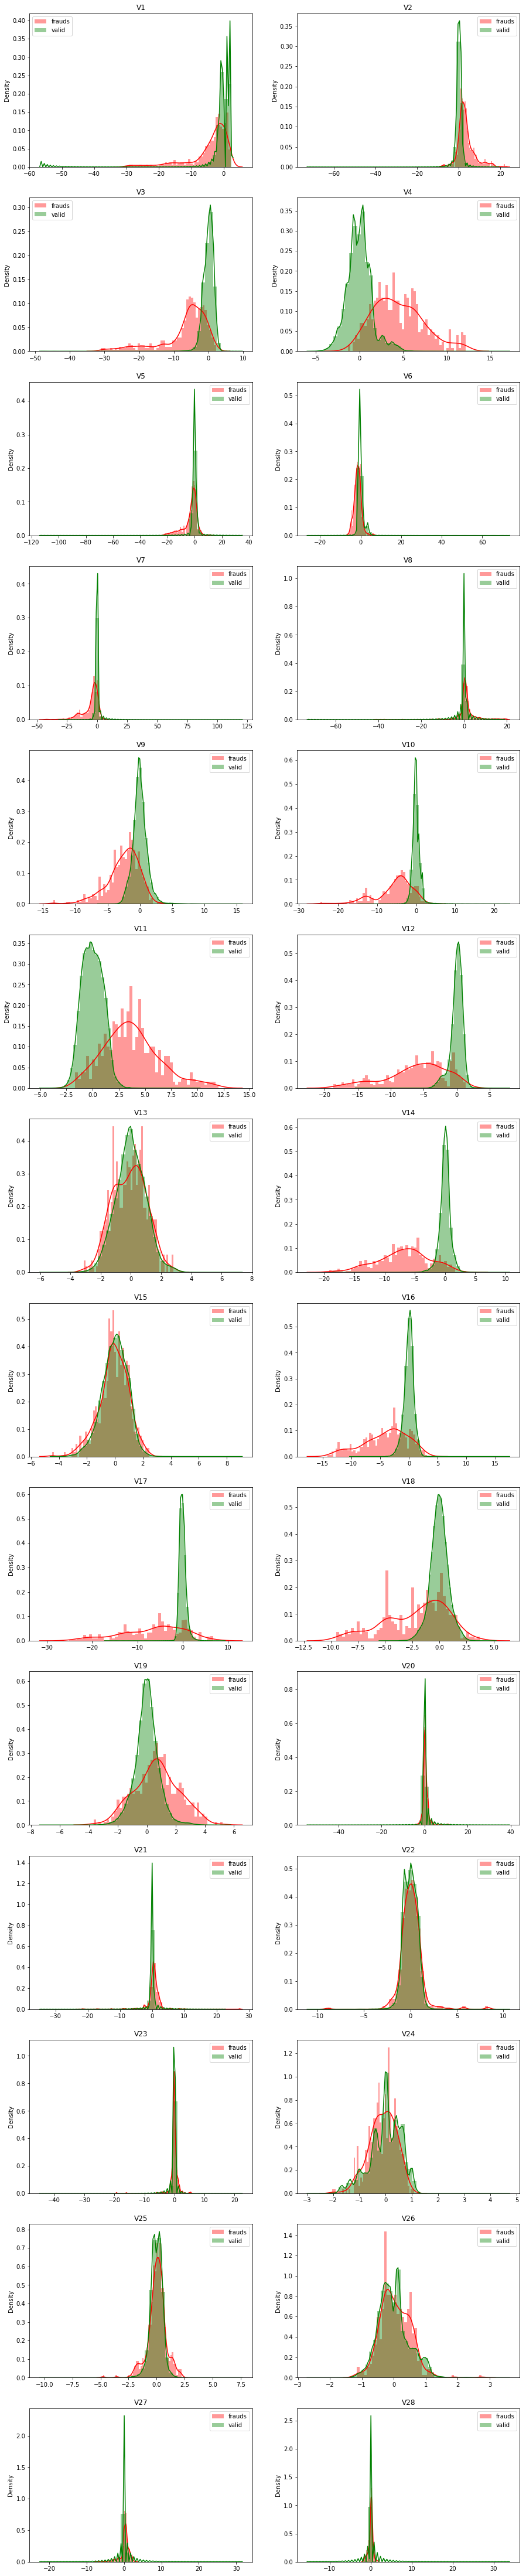

In [102]:
#Looking the V's features
import matplotlib.gridspec as gridspec
columns = df.iloc[:,1:29].columns

frauds = df.Class == 1
valid = df.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][frauds], bins = 50, color='r',label='frauds') 
    sns.distplot(df[col][valid], bins = 50, color='g',label='valid') 
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    plt.legend()
plt.show()

- For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have   clearly separated distributions for Class values 0 and 1(we have portion of data in the right side,skew for fraud in the       right and for valid is 0 ). V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile(because the   most values cluster on the right and left side). .V15,V22, V25, V26, V28 have similar profiles(they are overlap,impossible to   make comparisons for two values of class.)

- In general, the features distribution for Valid transactions (values of Class = 0) is centered around 0, sometime with a long   queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed             (asymmetric) distribution.


# Preprocess data

In [3]:
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(283726, 30)
(283726,)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (198608, 30)
Number transactions y_train dataset:  (198608,)
Number transactions X_test dataset:  (85118, 30)
Number transactions y_test dataset:  (85118,)


# Normalizing the amount column. The amount column is not in line with the anonimised features

In [117]:
from sklearn.preprocessing import StandardScaler

df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time','Amount'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813


Applying SMOTE with Over Sampling

In [6]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 344
Before OverSampling, counts of label '0': 198264 

After OverSampling, the shape of X_train: (396528, 30)
After OverSampling, the shape of y_train: (396528,) 

After OverSampling, counts of label '1': 198264
After OverSampling, counts of label '0': 198264


It should be clear that SMOTE has balanced our data completely, and that the minority class is now equal in size to the majority class.

# Model Prediction

# Random Forest Classifier with SMOTE

In [106]:
# Import the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# Define which resampling method and which ML model to use in the pipeline

resampling = BorderlineSMOTE(kind='borderline-2',random_state=0) # instead SMOTE(kind='borderline2') 
rf = RandomForestClassifier() 

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Random Forest Classifier', rf)])

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
y_predicted = pipeline.predict(X_test)

# Predict probabilities
probs = rf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, probs[:, 1])
print(accuracy_score(y_test, y_predicted))
print("AUC ROC score: ", roc_auc_score(y_test, probs[:,1]))
# Obtain the results from the classification report and confusion matrix 

print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',  confusion_matrix(y_true = y_test, y_pred = y_predicted))

0.9995183157499001
AUC ROC score:  0.9656448472447096
Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.90      0.77      0.83       129

    accuracy                           1.00     85118
   macro avg       0.95      0.88      0.91     85118
weighted avg       1.00      1.00      1.00     85118

Confusion matrix:
 [[84978    11]
 [   30    99]]


With the Random Forest Classifier with SMOTE Model, we have:

- The model is able to predict only 92% of fraudulent transactions .(precision score)

- 84978 transactions classified as valid and were actually valid(True Positive)(here 84980 are the number of CORRECTLY PREDICTED safe cases).

- 11 transactions classified as fraud but that were really valid(type 1 error)( here 9 are the number of MISCLASSIFIED safe cases. Hence 9 safe cases were misclassified as a fraud. This is potentially less dangerous as it’s better to stop some safe transactions with the slightest chance of fraud.;

- 30 transactions classified as valid but which were fraud (type 2 error)(here 30 are the number of MISCLASSIFIED fraud cases. hence 30 fraud cases were misclassified as safe. This is very dangerous because we are letting the fraud cases pass through. This can cause a huge loss to the organization.;

- 99 transactions classified as fraud and were actually fraud.

- we have 129 transactions as fraud.

- Look at the precision, recall, f1_score .The accuracy looks good.

- AUC denotes an excellent classifier(0.96).

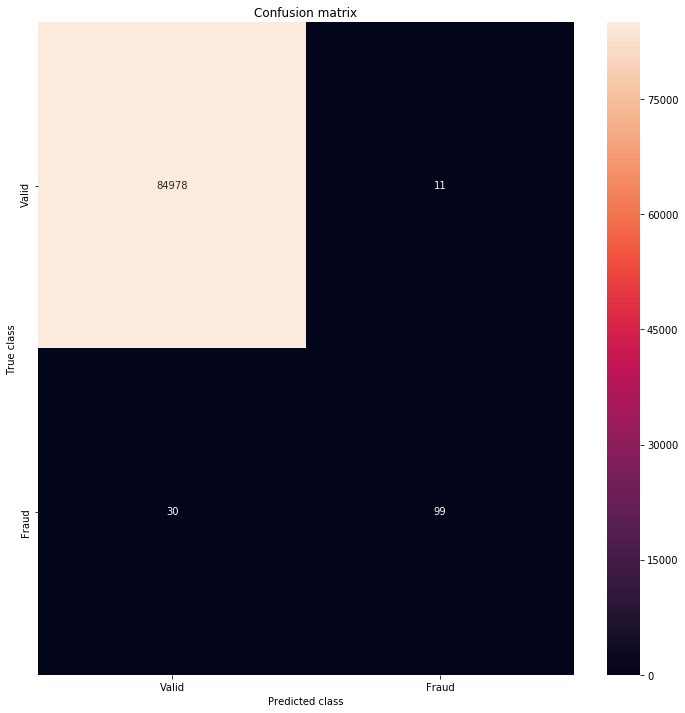

In [107]:
# printing the confusion matrix 
LABELS = ['Valid', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, y_predicted) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In Confusion matrix, 99 out of 129 fraud cases are detected, 30 cases are not detected and 11 false positive are identified.

# Plotting the Precision vs. Recall Curve

You can also plot a Precision-Recall curve, to investigate the trade-off between the two in your model. In this curve Precision and Recall are inversely related; as Precision increases, Recall falls and vice-versa. A balance between these two needs to be achieved in your model, otherwise you might end up with many false positives, or not enough actual fraud cases caught. To achieve this and to compare performance, the precision-recall curves come in handy.

In [108]:
# Obtain precision and recall 
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, predicted)
print(f'Precision: {precision}\nRecall: {recall}')

Precision: [0.00151554 0.92592593 1.        ]
Recall: [1.        0.7751938 0.       ]


In [109]:
def plot_pr_curve(recall, precision, average_precision):
    """
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
    """
    from inspect import signature
    plt.figure()
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')
    return plt.show()

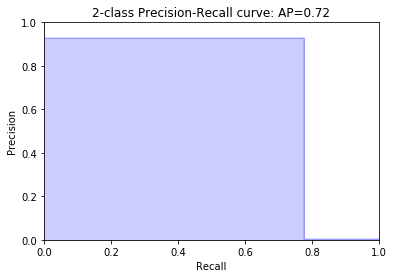

In [110]:
# Plot the recall precision tradeoff
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predicted)
plot_pr_curve(recall, precision, average_precision)

The Curve show us the Precision is %90~ and recall is %70~.so Precision is higher than of Recall.



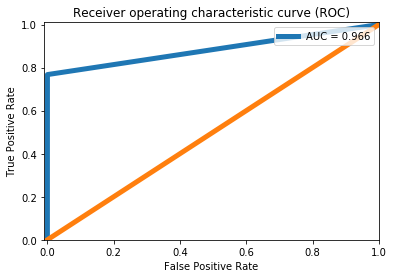

In [136]:
# Define a roc_curve function
# Create true and false positive rates
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    # Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)


Let's also visualize the features importance.

In [118]:
target = 'Class'
columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'normAmount']

In [119]:
rf.fit(df[columns], df[target].values)

RandomForestClassifier()

# Features importance

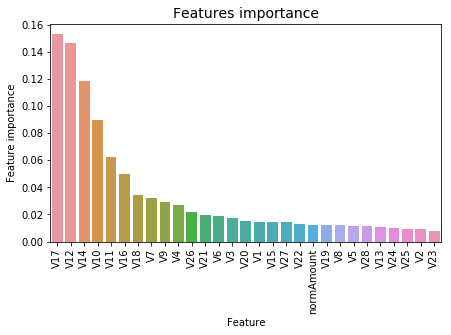

In [120]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
tmp = pd.DataFrame({'Feature': columns, 'Feature importance': rf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

We can observe that variables V12, V17, V14 of which importances are all greater than 0.1 , coincide with our previous conjecture in Exploratory Data Analysis.Also, the importances of V10, V11, V16 are all around 0.5 which indicates that they are relatively important in this data. The rest of variables perform constant low importances. Therefore, V12, V17 and V14 are important for classifying whether a transaction is fraudulent.

# Model : Isolation Forest, Local Outlier Factor(LOF) Algorithm

In [121]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random states
state = 1
fraud = df[df['Class']==1]
Valid = df[df['Class']==0]
outlier_fraction = len(fraud)/float(len(Valid))

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}
#20 is default, but the higher the percentage of outliers in your in your data set the
#higher you're going to want to make this number

In [122]:
# Fit the model
from sklearn.metrics import confusion_matrix
classifier = {"Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}
plt.figure(figsize=(9, 7))
n_outliers = len(fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print("AUC ROC score: ", roc_auc_score(y_test, probs[:,1]))
    print(classification_report(Y, y_pred))
    print('Confusion matrix:\n',  confusion_matrix(y_true = y_test, y_pred = y_predicted))

Isolation Forest: 659
0.9976773365852971
AUC ROC score:  0.9656448472447096
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.30      0.30      0.30       473

    accuracy                           1.00    283726
   macro avg       0.65      0.65      0.65    283726
weighted avg       1.00      1.00      1.00    283726

Confusion matrix:
 [[84978    11]
 [   30    99]]
Local Outlier Factor: 907
0.9968032538434969
AUC ROC score:  0.9656448472447096
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.04      0.04      0.04       473

    accuracy                           1.00    283726
   macro avg       0.52      0.52      0.52    283726
weighted avg       1.00      1.00      1.00    283726

Confusion matrix:
 [[84978    11]
 [   30    99]]


<Figure size 648x504 with 0 Axes>

Observations :

- The IF Model is detecting fraud transactions 0.30 and LOF Model is detecting fraud transactions 0.04;

- Isolation Forest detected 659 errors versus Local Outlier Factor detecting 907 errors.

- Isolation Forest has a 99.76% more accurate than LOF of 99.66%.

- When comparing error precision & recall for 2 models , the Isolation Forest performed much better than the LOF as we can see   
  that the detection of fraud cases is 28 % versus LOF detection rate of just 0 %.

- So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%.

- We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of 

  computational expense. We can also use complex anomaly detection models to get better accuracy in determining more fraudulent   
  cases.
  
  

With Isolation Forest, Local Outlier Factor Models, we have:

- 84976 transactions classified as valid and were actually valid(True Positive);

- 13 transactions classified as fraud but that were really valid(type 1 error);

- 29 transactions classified as valid but which were fraud (type 2 error);

- 100 transactions classified as fraud and were actually fraud.

- Look at the precision, recall, f1_score .The accuracy looks good.




# Building the XGBoost Model

In [123]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=0)
xg.fit(X_train,y_train)
xg.score(X_train,y_train)
print('{}: {}'.format(xg, n_errors))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None): 907


In [124]:
pred = xg.predict(X_test)

In [125]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred,y_test)
cm

array([[84981,    29],
       [    8,   100]], dtype=int64)

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.9995653093352758

In [127]:
print("AUC ROC score: ", roc_auc_score(y_test, probs[:,1]))
print (classification_report(y_test, pred))

AUC ROC score:  0.9656448472447096
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.93      0.78      0.84       129

    accuracy                           1.00     85118
   macro avg       0.96      0.89      0.92     85118
weighted avg       1.00      1.00      1.00     85118



With the XGboost  Model, we have:


- This Model is detecting fraud transactions 0.93 ;

- 84981 transactions classified as valid and were actually valid(True Positive);

- 8 transactions classified as fraud but that were really valid(type 1 error);

- 29 transactions classified as valid but which were fraud (type 2 error);

- 100 transactions classified as fraud and were actually fraud.

- Look at the precision, recall, f1_score .all are higher than from prevois model and also the accuracy is excellent.

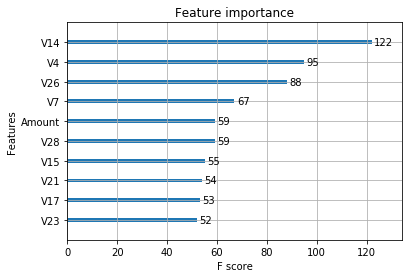

In [128]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
import matplotlib.pylab as plt
from matplotlib import pyplot
from xgboost import plot_importance
plot_importance(xg, max_num_features=10) # top 10 most important features
plt.show()

The most important features are V14, V4, V26, V7. (highest scores)

Text(0, 0.5, 'Precision')

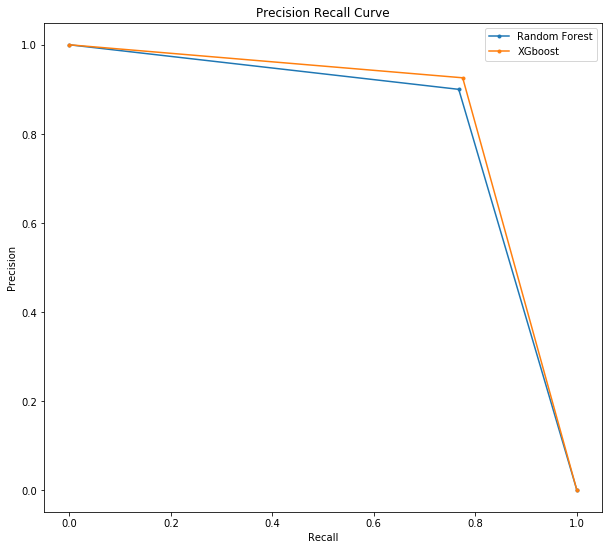

In [129]:
from sklearn.metrics import precision_recall_curve
plt.figure(figsize = (10,9))
precision_rf, recal_rf,_ = precision_recall_curve(y_test, y_predicted)
precision_xg, recal_xg, _ = precision_recall_curve(y_test,pred)

plt.plot(recal_rf, precision_rf, label = 'Random Forest', marker = '.')
plt.plot(recal_xg, precision_xg, label= 'XGboost', marker = '.')

plt.legend()
plt.title('Precision Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Hyperparameter tuning

In [137]:
model = RandomForestClassifier(n_estimators=10, 
                               criterion='gini', 
                               max_depth=None, 
                               min_samples_split=2, 
                               min_samples_leaf=1, 
                               max_features='auto', 
                               n_jobs=-1, class_weight=None)

we adjust model parameter to optimize for fraud detection.

# Model adjustments

A simple way to adjust the random forest model to deal with highly imbalanced fraud data, is to use the class_weights option when defining the sklearn model.

In [138]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5, n_estimators=100)

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

ROC Score:
0.9518853830696374

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.94      0.71      0.81       129

    accuracy                           1.00     85118
   macro avg       0.97      0.85      0.90     85118
weighted avg       1.00      1.00      1.00     85118


Confusion Matrix:
[[84983     6]
 [   38    91]]


we have now 5 less false positive and now 38 instead of 30 false negatives cases we are not catching.we mostly care about catching fraud, and not so much about the false positives, this does actually not improve our model at all.

# Adjusting RF for fraud detection

In [139]:
# def get_model_results
def get_model_results(X_train: np.ndarray, y_train: np.ndarray,
                      X_test: np.ndarray, y_test: np.ndarray, model):
    """
    model: sklearn model (e.g. RandomForestClassifier)
    """
    # Fit your training model to your training set
    model.fit(X_train, y_train)

    # Obtain the predicted values and probabilities from the model 
    predicted = model.predict(X_test)
    
    try:
        probs = model.predict_proba(X_test)
        print('ROC Score:')
        print(roc_auc_score(y_test, probs[:,1]))
    except AttributeError:
        pass

    # Print the ROC curve, classification report and confusion matrix
    print('\nClassification Report:')
    print(classification_report(y_test, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predicted))

In [140]:
# Change the model options
model = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12},
                               criterion='entropy',
                               # Change depth of model
                               max_depth=10,
                               # Change the number of samples in leaf nodes
                               min_samples_leaf=10, 
                               # Change the number of trees to use
                               n_estimators=20,
                               n_jobs=-1,
                               random_state=5)

# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

ROC Score:
0.9801904596682416

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.78      0.79      0.78       129

    accuracy                           1.00     85118
   macro avg       0.89      0.90      0.89     85118
weighted avg       1.00      1.00      1.00     85118


Confusion Matrix:
[[84960    29]
 [   27   102]]


As you can see here, I've reduced the number of false negative and catching more cases of fraud and also false positive increased.

# Parameter optimization with GridSearchCV

With GridSearchCV you can define which performance metric to score the options on. Since for fraud detection we are mostly interested in catching as many fraud cases as possible, we can optimize our model settings to get the best possible Recall score.

In [142]:
# Define the parameter sets to test
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [1, 30],
              'max_features': ['auto', 'log2'], 
              'max_depth': [4, 8, 10, 12],
              'criterion': ['gini', 'entropy']}

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 30}

# Model results with GridSearchCV

In [143]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12},
                               criterion='gini',
                               max_depth=8,
                               max_features='log2', 
                               min_samples_leaf=10,
                               n_estimators=30,
                               n_jobs=-1,
                               random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

ROC Score:
0.963409400632877

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.76      0.78      0.77       129

    accuracy                           1.00     85118
   macro avg       0.88      0.89      0.89     85118
weighted avg       1.00      1.00      1.00     85118


Confusion Matrix:
[[84957    32]
 [   28   101]]


it didn't improve.

# Ensemble methods

- Ensemble methods are techniques that create multiple machine learning models and then combine them to produce a final result.
  Usually produce more accurate predictions than a single model.
  
- Ensemble methods take a myriad of models into account and average them to produce one final model
  -Less likely to be the result of overfitting
  -Can improve prediction performance

# Stacking Ensemble Methods

Multiple models are combined via a "voting" rule on the model outcome

# Voting Classifier

In [144]:
from sklearn.ensemble import VotingClassifier

In [145]:
# Define Models
from xgboost import XGBClassifier
clf1 = RandomForestClassifier(random_state=1)
clf2 = XGBClassifier(random_state=0)

In [146]:
# Combine models into ensemble
ensemble_model = VotingClassifier(estimators=[('rf', clf1), ('xg', clf2)], voting='hard')

In [147]:
# Fit and predict as with other models
ensemble_model.fit(X_train, y_train)
ensemble_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# XGBoost Model

In [148]:
# Define the XGBoost model with weights
model = XGBClassifier(class_weight={0:1, 1:15}, random_state=5, solver='liblinear')

# Get the model results
get_model_results(X_train, y_train, X_test, y_test, model)

[15:22:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { class_weight, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


ROC Score:
0.9766898242462932

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.93      0.78      0.84       129

    accuracy                           1.00     85118
   macro avg       0.96      0.89      0.92     85118
weighted avg       1.00      1.00      1.00     85118


Confusion Matrix:
[[84981     8]
 [   29   100]]


As you can see the XGBoost has quite different performance from the Random Forest. less false positives, but also a better precision.

# Voting Classifier


In [149]:
# Define the two classifiers to use in the ensemble

clf1 = RandomForestClassifier(class_weight={0:1, 1:12}, 
                              criterion='gini', 
                              max_depth=8, 
                              max_features='log2',
                              min_samples_leaf=10, 
                              n_estimators=30, 
                              n_jobs=-1,
                              random_state=5)

clf2 = XGBClassifier(class_weight={0:1, 1:15}, random_state=5, solver='liblinear')


# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('rf', clf1), ('xg', clf2)], voting='hard')

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

[15:23:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { class_weight, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.95      0.75      0.84       129

    accuracy                           1.00     85118
   macro avg       0.98      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118


Confusion Matrix:
[[84984     5]
 [   32    97]]


here we have 5 false positive which is 3 less than previous. I do care about catching as many fraud cases as I can, whilst keeping the false positives low, this is a pretty good trade-off.

# Adjusting weights within the Voting Classifier

In [150]:
# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[('rf', clf1), ('xg', clf2)], voting='soft', weights=[1, 4], flatten_transform=True)

# Get results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

[15:23:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { class_weight, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


ROC Score:
0.972663585009314

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.92      0.78      0.84       129

    accuracy                           1.00     85118
   macro avg       0.96      0.89      0.92     85118
weighted avg       1.00      1.00      1.00     85118


Confusion Matrix:
[[84980     9]
 [   29   100]]


here we have 9 false positive which is 4 more than previous. Precision is high because of reducing of false positive.

# CONCLUSION

- The highest values of Valid transactions are 25691.16 while of Fraudulent transactions are just 2125.87.

- The average value of Valid transactions are small(USD 88.41) than fraudulent transactions that is USD 123.87.

- I would like to choose XGBoost method, because this method has less false positive.
 
- So overal XGBoost Method performed much better in deterining in fraud cases which is around 90% .

- The Precision in XGBoost method is more than of Random Forest.(we have less false pasitive which is 5)
